# Bulldozer sales price prediction via `machine learning`

### 1.Getting out tool ready

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Lets import modelling tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_log_error,r2_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

### 2.Lets's import our dataset and study it.

In [2]:
data = pd.read_csv('TrainAndValid.csv',low_memory=False)
data.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Well to work with our model we need numerical data(int) as well as no empty columns.Lets get them!

In [3]:
data = pd.read_csv('TrainAndValid.csv',parse_dates=['saledate'],low_memory=False)
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
##Sorting the thingswill make things way easier...
data.sort_values(by=['saledate'],inplace=True,ascending=True)

## According to kaggle, The dataset in based on the true timeline.Hence we must specify the year , not the complete data
data['saleYear'] = data.saledate.dt.year

## Get rid of the date.
data.drop('saledate',axis=1,inplace=True)

## Lets check the counting of data.
data.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [5]:
##Well there's a lot of null values! Lets fill them
##Numerical data
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        data[label+'_is_missing'] = pd.isnull(content)
        data[label] = content.fillna(content.median())

In [6]:
for label,content in data.items():
    if pd.api.types.is_string_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [7]:
## Well the string values are also null lets convert them into categorical values
for label , content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype('category').cat.as_ordered()

## Also lets fill those values.

for label , content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label+'_is_misssing'] = pd.isnull(content)
        data[label] = pd.Categorical(content).codes + 1

## 3.Studying features

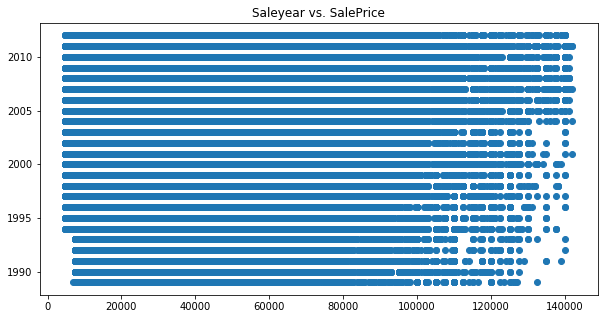

In [8]:
fig ,axes = plt.subplots(figsize=(10,5))
axes.scatter(x=data['SalePrice'],y=data['saleYear']);
plt.title('Saleyear vs. SalePrice');
plt.xlabel=('SalePrice');
plt.ylabel=('Saleyear')

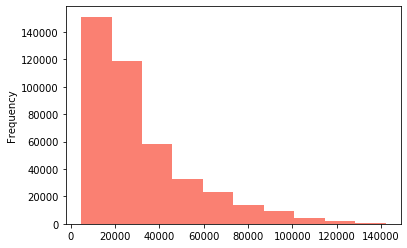

In [9]:
data['SalePrice'].plot.hist(color='salmon');

# 4.Modelling the data

In [10]:
%%time
## Dividing the data into train and test part
X = data.drop('SalePrice',axis=1)
y = data['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

##Using RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,random_state=42)
model.fit(X_train,y_train)
model.score(X_test,y_test)

Wall time: 3min 4s


0.9030099354394588

### The values is pretty good but not perfect. Lets tune the validation part of dataset to make it right.

In [11]:
##Lets split the data into train and valid form
train_data = data[data['saleYear'] != 2012]

valid_data = data[data['saleYear'] == 2012]

X_train , y_train = train_data.drop('SalePrice',axis=1) , train_data['SalePrice']
X_valid , y_valid = valid_data.drop('SalePrice',axis=1) , valid_data['SalePrice']

In [19]:
##To calculate the root mean squared log error
def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

##To calculte other metrics
def show_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores= {'Training MAE' : mean_absolute_error(y_train,train_preds),
             'Validation MAE':mean_absolute_error(y_valid,valid_preds),
             'Training RMSLE':rmsle(y_train,train_preds),
             'Validation RMSLE':rmsle(y_valid,valid_preds),
             'Training R^2':r2_score(y_train,train_preds),
             'Validation R^2':r2_score(y_valid,valid_preds)}
    return scores
    

In [14]:
show_scores(model)

{'Training MAE': 2244.5804997195387,
 'Validation MAE': 2583.708801175149,
 'Training RMSLE': 0.12448902658516074,
 'Validation RMSLE': 0.1268036626285347,
 'Training R^2': 0.969579815534393,
 'Validation R^2': 0.9698453884684767}

###### Woah!! The scores are pretty cool.

## 5.Hyperparameter tuning with RandomSearchCV

In [15]:
gs_grid = {'n_estimators':np.arange(100,200),
           'max_depth':[None,3,5],
           'min_samples_leaf':np.arange(1,2),
           'max_features':['auto','sqrt'],
           'max_samples':[10000]}
gs_model = RandomizedSearchCV(estimator=model,param_distributions=gs_grid,verbose=2,n_jobs=2,n_iter=2)

gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   40.2s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                

In [16]:
##Lets see the score of our model.
gs_model.score(X_test,y_test)

0.8146165280121413

In [20]:
##Getting metrics with RandomsearchCv model.
show_scores(gs_model)

{'Training MAE': 6549.298053893473,
 'Validation MAE': 8027.041642553566,
 'Training RMSLE': 0.29423845671770515,
 'Validation RMSLE': 0.3285140519899759,
 'Training R^2': 0.815480680550506,
 'Validation R^2': 0.8007143908274569}

### Well the baseline scores look more better then tuned one.Lets shift to them!

## 6.Feature importance

In [46]:
len(model.feature_importances_)
model.feature_importances_

array([5.52799600e-02, 2.21863913e-02, 3.47587707e-02, 5.96604300e-04,
       6.55184008e-03, 2.66240924e-01, 4.26507181e-03, 1.50122735e-03,
       2.13064978e-02, 5.78440343e-02, 5.59595048e-02, 4.60725786e-03,
       3.75452414e-03, 2.28869193e-01, 3.74314199e-02, 1.41168635e-02,
       1.89261819e-04, 1.91110192e-04, 1.57071343e-03, 8.28043268e-03,
       5.53026369e-04, 5.16685194e-05, 7.17439499e-04, 2.00523411e-04,
       1.37218159e-03, 3.62749251e-05, 2.46585933e-03, 5.76471192e-03,
       1.54995104e-03, 1.77519667e-03, 3.80643221e-03, 2.07591083e-03,
       2.53924396e-03, 4.92764616e-03, 2.73675293e-03, 1.98375351e-03,
       1.25978298e-03, 1.31702232e-02, 7.35434146e-06, 5.04655543e-06,
       2.00269586e-04, 1.28733637e-03, 1.67012773e-03, 9.43101952e-04,
       3.06301586e-04, 6.33138085e-04, 2.06058094e-04, 2.02711294e-03,
       1.15870960e-03, 2.27830434e-04, 2.09429259e-04, 7.62134838e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [55]:
##Lets plot it.
def plot_features(columns,importances,n=20):
    df = (pd.DataFrame({'features':columns,
                        'feature_importance':importances,
                      }).sort_values('feature_importance',ascending=False)
                         .reset_index(drop=True))
    fig,axes = plt.subplots()
    axes.barh(df['features'][:n] , df['feature_importance'][:20],color='salmon');
    axes.set_ylabel('Features');
    axes.set_xlabel('Features Columns');
    axes.invert_yaxis()

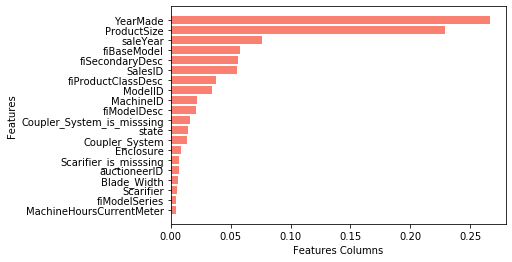

In [56]:
plot_features(X_train.columns,model.feature_importances_)

## This is it! We have build an machine learing model with a good `score` and higher `prediction`!